# Análisis fuga de clientes



El objetivo del proyecto es aplicar un algoritmo de árboles de decisión para construir un modelo predictivo de fuga de clientes en la industria de las telecomunicaciones.
<br>
 Roberto González


### Cargar las librerias

In [ ]:
install.packages(c("rpart.plot","eeptools"), dependencies = TRUE, INSTALL_opts = '--no-lock', verbose = TRUE)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

system (cmd0): /usr/lib/R/bin/R CMD INSTALL --no-lock

also installing the dependencies ‘plotrix’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘zoo’, ‘Formula’, ‘plotmo’, ‘TeachingDemos’, ‘lme4’, ‘abind’, ‘coda’, ‘lmtest’, ‘sp’, ‘earth’, ‘arm’, ‘vcd’, ‘maptools’


foundpkgs: plotrix, minqa, nloptr, Rcpp, RcppEigen, zoo, Formula, plotmo, TeachingDemos, lme4, abind, coda, lmtest, sp, earth, arm, vcd, maptools, rpart.plot, eeptools, /tmp/RtmpSC9LmQ/downloaded_packages/plotrix_3.8-2.tar.gz, /tmp/RtmpSC9LmQ/downloaded_packages/minqa_1.2.5.tar.gz, /tmp/RtmpSC9LmQ/downloaded_packages/nloptr_2.0.3.tar.gz, /tmp/RtmpSC9LmQ/downloaded_packages/Rcpp_1.0.10.tar.gz, /tmp/RtmpSC9LmQ/downloaded_packages/RcppEigen_0.3.3.9.3.tar.gz, /tmp/RtmpSC9LmQ/downloaded_packages/zoo_1.8-11.tar.gz, /tmp/RtmpSC9LmQ/downloaded_packages/Formula_1.2-5.tar.gz, /tmp/RtmpSC9LmQ/downloaded_packages/plotmo_3.6.2.tar.gz, /tmp/RtmpSC9LmQ/downloade

In [ ]:
library(dplyr)
library(ggplot2)
library(readxl)
library(eeptools)
library(magrittr)
library(rpart)
library(rpart.plot)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Cargamos y transformamos el dataset



In [ ]:
dataURL = 'https://clasesmlds.s3.amazonaws.com/data/proyecto_1_datos_fuga.xls'
dataFile = 'Proyecto_1_Base_analisis_de_fuga.xls'

download.file(url = dataURL, destfile=dataFile)

In [ ]:
dataset <- read_xls(dataFile)

cat("\nPrimeras 5 filas")
head(dataset)

New names:
• `` -> `...1`



Primeras 5 filas

...1,Sexo,Edad,Casado,Numero Dependientes,Recomendaciones realizadas,Meses como Cliente,Plan,Cargo Mensual LLamadas,Multiples lineas,⋯,Usa Streaming Musica,Plan Ilimitado Datos,Tipo Contrato,Cobro Mensual,Historico de Devoluciones,Historico Cargos extra datos,Historico Cargos Llamadas,Historico Cobro Acumulado,Fugado,Causa Fuga
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0,Mujer,37,Si,0,2,9,Ninguno,22042.8,No,⋯,No,Si,Anual,34112,0.0,0,198385.2,506901.2,No,NA
1,Hombre,46,No,0,0,9,Ninguno,5558.8,Si,⋯,Si,No,Mensual,-2080,19931.6,5200,50029.2,317345.6,No,NA
2,Hombre,50,No,0,0,4,Plan E,17498.0,No,⋯,No,Si,Mensual,38428,0.0,0,69992.0,216034.0,Si,Mejor la Competencia
3,Hombre,78,Si,0,1,13,Plan D,14466.4,No,⋯,No,Si,Mensual,50960,0.0,0,188063.2,831745.2,Si,Disconforme
4,Mujer,75,Si,0,3,3,Ninguno,3837.6,No,⋯,No,Si,Mensual,43628,0.0,0,11512.8,150560.8,Si,Disconforme
5,Mujer,23,No,3,0,9,Plan E,8720.4,No,⋯,Si,Si,Mensual,36088,0.0,0,78483.6,375637.6,No,NA


Transformamos el campo Fuga en una variable categorica

In [ ]:
dataset$Fugado <- as.factor(dataset$Fugado)

Definimos dataset de entrenamiento

In [ ]:
set.seed(2101)
train<-sample(2, nrow(dataset), replace=TRUE, prob=c(0.8,0.2))


Entrenamiento del modelo

In [ ]:
set.seed(8)

modelo.1 <- rpart(Fugado ~ ., data = dataset[train==1,],control = rpart.control(maxdepth=9))

Graficamos los resultados

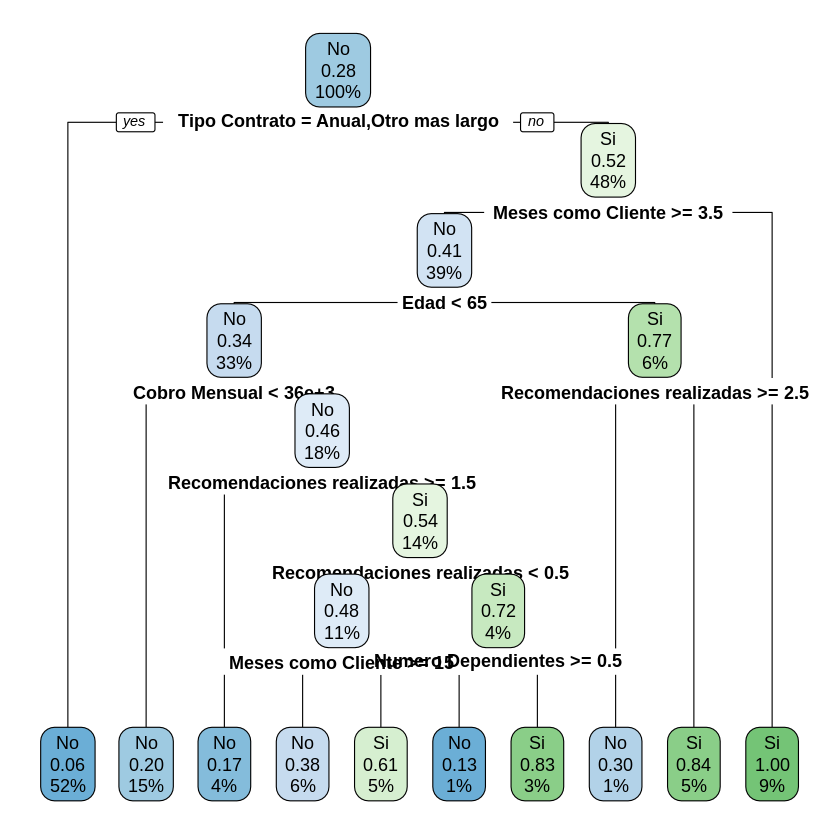

In [ ]:
rpart.plot(modelo.1, cex=0.9, roundint=FALSE)

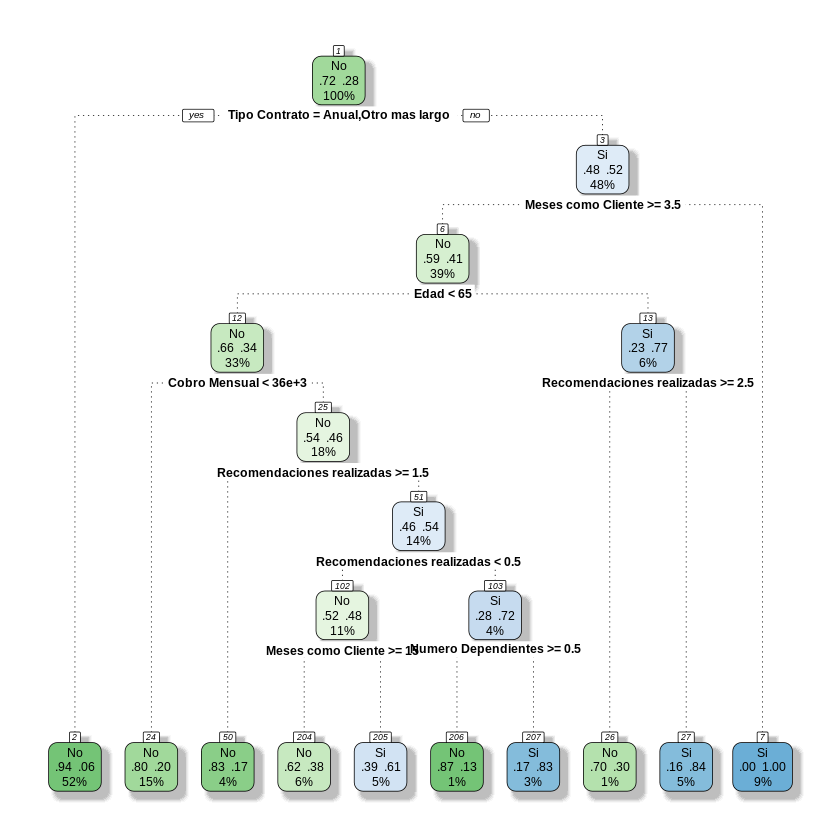

In [ ]:
rpart.plot(modelo.1, extra = 104, tweak=1.2,
  box.palette = "GnBu", branch.lty = 3, shadow.col = "gray", nn = TRUE, roundint=FALSE)

In [ ]:
png("arbol_decision_modelo_1.png", width=2560, height=1440)
prp(modelo.1, type = 4, extra = 101, leaf.round = 1, fallen.leaves = TRUE,
    varlen = 0, tweak = 1.5, roundint=FALSE)
dev.off()

png 
  2

Hacemos una prediccion usando el conjunto de datos de validacion

In [ ]:
fuga_predict <- predict(modelo.1, dataset[train==2,], type='class')

In [ ]:
tconf <- table(fuga_predict, dataset[train==2,]$Fugado)
tconf


            
fuga_predict  No  Si
          No 907 126
          Si  45 243